## Gaussian Naive Bayes Classification for the Titanic Survival Prediction 

### Overview

This notebook demonstrates Titanic survival prediction using the Gaussian Naive Bayes classification algorithm. The key steps include:

    1.Data Preprocessing: Preparing the dataset by handling missing values, encoding categorical features, and selecting 
      relevant variables.
    2.Exploratory Data Analysis (EDA): Analyzing and visualizing key patterns in the data to gain insights.
    3.Model Training: Implementing and training a Gaussian Naive Bayes model to predict survival.
    4.Model Evaluation: Assessing the performance of the model using appropriate metrics and visualizations.

### Dataset :


- `passenger_id:` The unique identifier for each passenger.
- `name:` The name of the passenger.
- `p_class:` The passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- `sex:` The gender of the passenger.
- `age:` The age of the passenger.
- `sib_sp:` The number of siblings or spouses the passenger had aboard the Titanic.
- `parch:` The number of parents or children the passenger had aboard the Titanic.
- `ticket:` The ticket number of the passenger.
- `fare:` The fare the passenger paid for the ticket.
- `cabin:` The cabin number where the passenger stayed.
- `embarked:` The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).
- `survived:` Whether the passenger survived (1) or not (0).



In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.naive_bayes import GaussianNB

 ### Data Preparation and Exploration


In [78]:
df = pd.read_csv('titanic.csv')
print(f"Rows :{df.shape[0]}  columns :{df.shape[1]} ")
df.head()

Rows :891  columns :12 


,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [79]:
print("Missing values : ")
print(df.isna().sum())

Missing values : 
passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64


In [80]:
#  Drop columns that do not add much value
df = df.drop(["passenger_id", "name","sib_sp","parch" , "ticket" , "cabin" , "embarked"] , axis = 1)


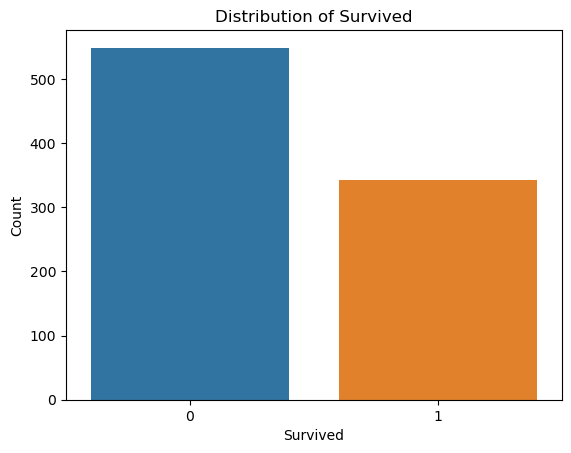

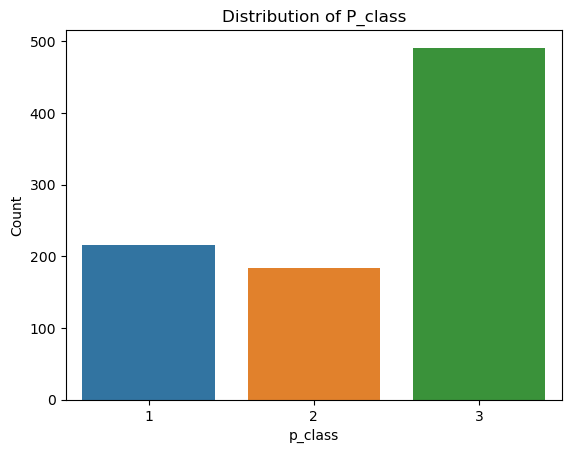

In [81]:

#'survived'
sns.countplot(x = 'survived' , data = df)
plt.title("Distribution of Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# 'p_class'
sns.countplot(x = 'p_class' , data = df)
plt.title("Distribution of P_class")
plt.xlabel("p_class")
plt.ylabel("Count")
plt.show()


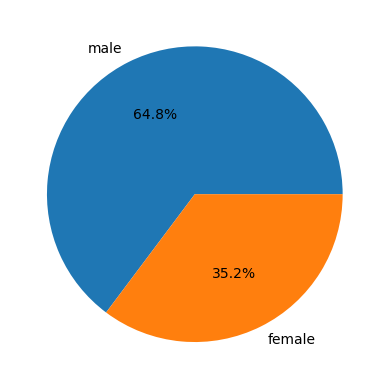

In [82]:
# Visualize the distribution of 'sex' using a pie chart (percentage)
sex_counts = df.sex.value_counts()
plt.pie(sex_counts.values , labels = sex_counts.index , autopct =  '%1.1f%%')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

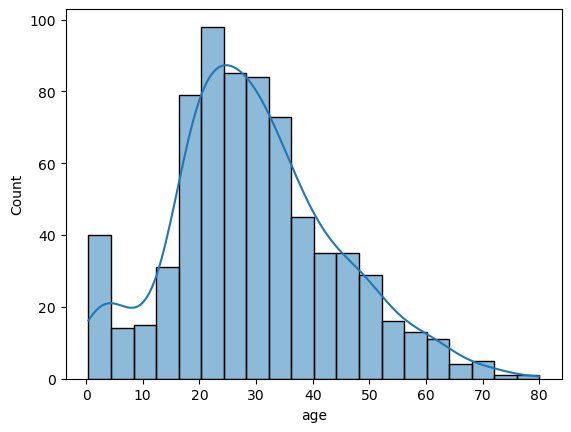

In [83]:
# Visualize the distribution of 'age' using a histogram
sns.histplot(x = 'age' , data = df , kde = True)

<Axes: xlabel='fare', ylabel='Count'>

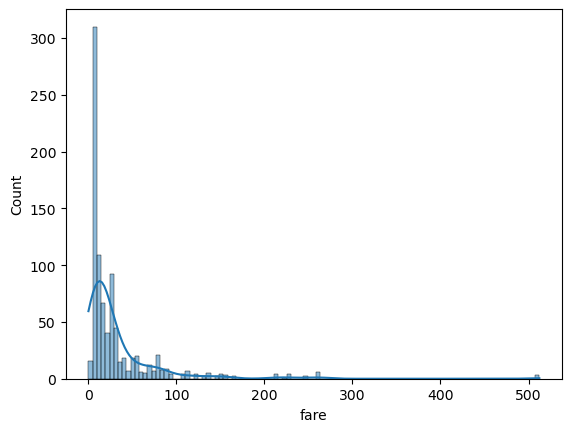

In [84]:
# Visualize the distribution of 'fare' using a histogram
sns.histplot(x = 'fare' , data = df , kde = True)

### Data Preprocessing



In [85]:
# Fill in missing values in the 'age' and 'fare' columns with their median values
df = df.fillna({
    'age' : df.age.mean(),
    'fare': df.fare.mean()
})

df.isna().sum()

p_class     0
sex         0
age         0
fare        0
survived    0
dtype: int64

In [86]:
# Encode the 'sex' column using one-hot encoding
df = pd.get_dummies(df , columns = ['sex'] , drop_first = True)

In [87]:
# Standardize the 'fare' column using StandardScaler

scaler = StandardScaler()
df['fare'] = scaler.fit_transform(df[['fare']])

df.head()


,p_class,age,fare,survived,sex_male
0,3,22.0,-0.504775,0,True
1,1,38.0,0.785395,1,False
2,3,26.0,0.000000,1,False
3,1,35.0,0.419030,1,False
4,3,35.0,-0.488657,0,True


In [88]:
# Select the features and target variable for modeling
X = df[['p_class' , 'age' , 'sex_male' , 'fare']]
y = df['survived']


# Split the dataset 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state=42)


### Model Training Using Gaussian Naive Bayes


In [89]:
model = GaussianNB()
model.fit(X_train , y_train)

# Make predictions
y_pred = model.predict(X_test)


In [90]:
# Evaluate the model using a classification report 
print('Report : ')
print(classification_report(y_test , y_pred))

Report : 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       157
           1       0.73      0.74      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [91]:
# Visualize the confusion matrix for the model

cm = confusion_matrix(y_test, y_pred)
cm

array([[126,  31],
       [ 29,  82]], dtype=int64)

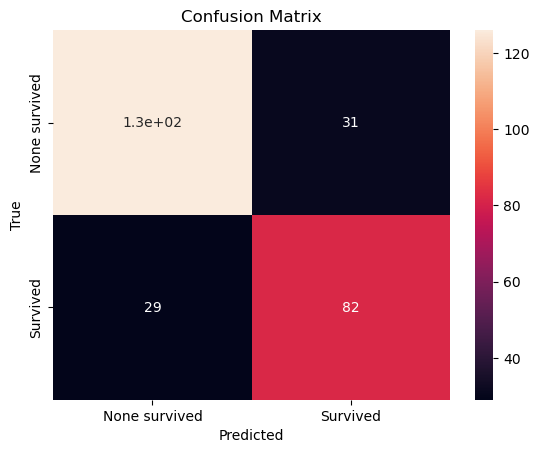

In [92]:
labels = ['None survived' , 'Survived']
sns.heatmap(data = cm , xticklabels = labels , yticklabels = labels , annot = True)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()